## Problem Statement :: Quality Rating prediction

## Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Gathering

In [8]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/manufacturing_quality_prediction-main/manufacturing_quality_prediction-main/manufacturing.csv')
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


### Step 2:EDA - Explore the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [10]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


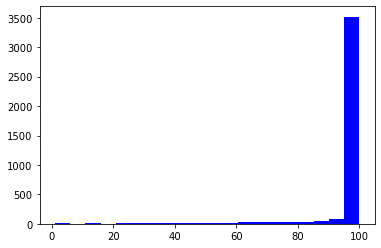

In [11]:
plt.hist(df['Quality Rating'], bins= 20, color ='blue')
plt.show()

In [12]:
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

#### Checking data for Outliers

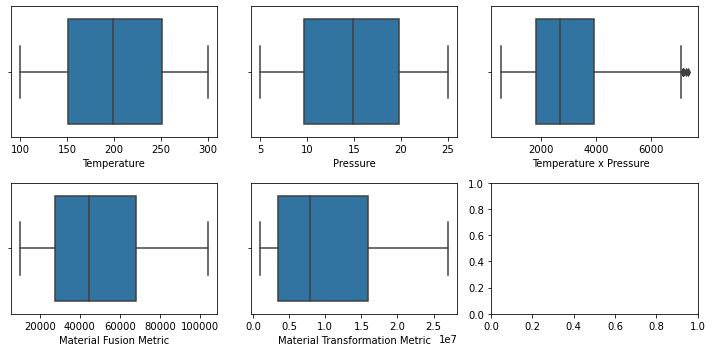

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Temperature (°C)'], ax = axs[0,0]).set(xlabel= 'Temperature')
plt2 = sns.boxplot(df['Pressure (kPa)'], ax = axs[0,1]).set(xlabel='Pressure')
plt3 = sns.boxplot(df['Temperature x Pressure'], ax = axs[0,2]).set(xlabel='Temperature x Pressure  ')
plt1 = sns.boxplot(df['Material Fusion Metric'], ax = axs[1,0]).set(xlabel='Material Fusion Metric')
plt2 = sns.boxplot(df['Material Transformation Metric'], ax = axs[1,1]).set(xlabel='Material Transformation Metric')

plt.tight_layout()

<AxesSubplot:>

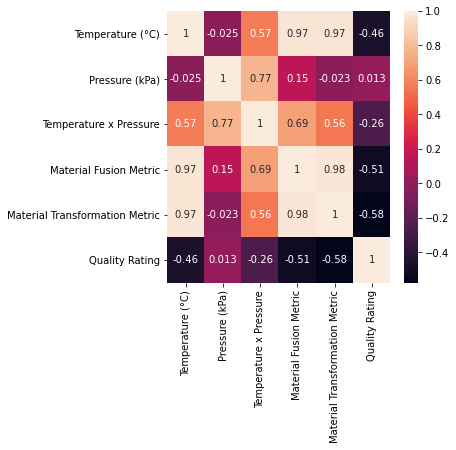

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

### Step 3: Train Test split

In [17]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [18]:
numerical_features = ['Temperature (°C)','Pressure (kPa)','Temperature x Pressure','Material Fusion Metric','Material Transformation Metric']

In [19]:
def train_test_split_data(df):
    y = df["Quality Rating"]
    x = df.drop('Quality Rating',axis=1)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    return x_train, x_test, y_train, y_test,features

In [20]:
x_train, x_test, y_train, y_test,features = train_test_split_data(df)

In [21]:
x_train.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3713,195.047668,10.725532,2091.990056,39277.426200,7.420199e+06
713,191.281913,20.549397,3930.727882,45266.322135,6.998348e+06
3819,178.227142,24.033257,4283.378732,45646.462194,5.660792e+06
3584,150.036001,15.002019,2250.842973,25887.164865,3.377206e+06
2294,197.686618,14.180148,2803.225454,41931.294556,7.725392e+06
1084,272.224602,15.941536,4339.678299,78157.497273,2.017329e+07
1388,120.221498,20.745969,2494.111417,23382.174098,1.737156e+06
361,280.796791,11.067122,3107.612368,80202.352126,2.213982e+07
3687,225.307042,7.383163,1663.478696,51165.727589,1.143727e+07
1368,258.656335,13.168546,3406.127843,69186.664922,1.730474e+07


### Step 4: Train and Evaluate the model

In [22]:
param_grid = [{'learning_rate': [0.1, 0.2, 0.3],
               'max_depth': [3,4,5],
               'subsample': [0.8, 0.9],
               'colsample_bytree': [0.8, 0.9],
               'n_estimators' : [50]}
             ]

### XGBoost

XGBoost, or eXtreme Gradient Boosting, is a machine learning algorithm that belongs to the family of gradient boosting methods. for both classification and regression tasks.
XGBoost works by building a series of decision trees sequentially, each one correcting the errors of the previous tree, thereby improving predictive accuracy. 
It's widely used in various domains due to its effectiveness in handling structured/tabular data and its ability to handle large datasets efficiently.


In [23]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=0)
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5, scoring = 'r2')
search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.999, total=   1.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.999, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.998, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.998, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.998, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9, score=0.999, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9, score=0.999, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9, score=0.998, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9, score=0.998, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9, score=0.998, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8, score=0.999, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9, score=1.000, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.999, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.999, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, score=0.998, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=

[CV]  colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=

[CV]  colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8 
[CV]  colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.8, score=1.000, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   14.4s finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=0, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                        

In [24]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.076380,0.001671,0.003828,0.000346,0.9,0.2,5,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999819,0.999836,0.999816,0.999784,0.999880,0.999827,0.000031,1
10,0.070093,0.008735,0.007850,0.006515,0.8,0.2,5,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999819,0.999836,0.999816,0.999784,0.999880,0.999827,0.000031,1
29,0.082474,0.003043,0.003806,0.000968,0.9,0.2,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999784,0.999784,0.999723,0.999860,0.999895,0.999809,0.000061,3
11,0.079900,0.007581,0.001571,0.001925,0.8,0.2,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999784,0.999784,0.999723,0.999860,0.999895,0.999809,0.000061,3
8,0.061810,0.004537,0.006841,0.008430,0.8,0.2,4,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999821,0.999810,0.999757,0.999754,0.999833,0.999795,0.000033,5
26,0.072548,0.004943,0.003997,0.000005,0.9,0.2,4,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999821,0.999810,0.999757,0.999754,0.999833,0.999795,0.000033,5
9,0.068329,0.008134,0.004873,0.005785,0.8,0.2,4,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999767,0.999775,0.999690,0.999833,0.999860,0.999785,0.000059,7
27,0.071355,0.000985,0.003926,0.000149,0.9,0.2,4,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999767,0.999775,0.999690,0.999833,0.999860,0.999785,0.000059,7
35,0.083521,0.001184,0.004400,0.000490,0.9,0.3,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.3...",0.999808,0.999683,0.999607,0.999754,0.999882,0.999747,0.000095,9
17,0.078198,0.001595,0.003731,0.006062,0.8,0.3,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.3...",0.999808,0.999683,0.999607,0.999754,0.999882,0.999747,0.000095,9


In [25]:
search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [26]:
model = XGBRegressor(colsample_bytree= 0.8, learning_rate = 0.2, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [27]:
r2_score(y_test, xgb_predict)

0.9997708349098915

### Step 5: Get important features

In [29]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
1,0.000046,Pressure (kPa)
2,0.000055,Temperature x Pressure
3,0.000089,Material Fusion Metric
4,0.299066,Material Transformation Metric
0,0.700744,Temperature (°C)


<BarContainer object of 5 artists>

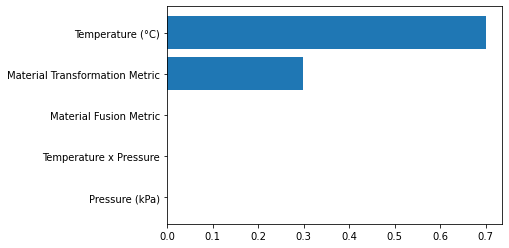

In [30]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

### Step 6: Retrain and Evaluate the model

In [31]:
x_train = x_train[['Temperature (°C)','Material Transformation Metric']]
x_test = x_test[['Temperature (°C)','Material Transformation Metric']]

In [32]:
model = XGBRegressor(colsample_bytree= 0.8, learning_rate = 0.2, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [33]:
r2_score(y_test, xgb_predict)

0.9998343468773041

In [34]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = ['Temperature (°C)','Material Transformation Metric']
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
1,0.395114,Material Transformation Metric
0,0.604886,Temperature (°C)


<BarContainer object of 2 artists>

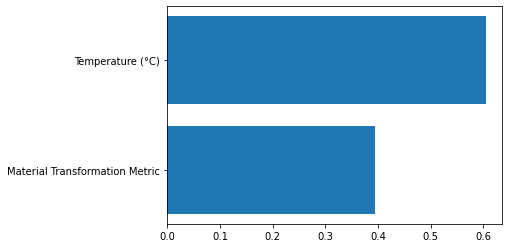

In [35]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)